# EDA

### Data Loading and Exploration

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv('data/data_entries/miccai2023_nih-cxr-lt_labels_train.csv')
df_val = pd.read_csv('data/data_entries/miccai2023_nih-cxr-lt_labels_val.csv')
df_test = pd.read_csv('data/data_entries/miccai2023_nih-cxr-lt_labels_test.csv')

In [4]:
df_train.shape, df_val.shape, df_test.shape

((78506, 22), (12533, 22), (21081, 22))

In [5]:
df_train_val = pd.concat([df_train, df_val], ignore_index=True)

In [6]:
assert df_train_val.shape[0] == df_train.shape[0] + df_val.shape[0]

In [7]:
df_train_val.columns

Index(['id', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass',
       'Nodule', 'Pleural Thickening', 'Pneumonia', 'Pneumothorax',
       'Pneumoperitoneum', 'Pneumomediastinum', 'Subcutaneous Emphysema',
       'Tortuous Aorta', 'Calcification of the Aorta', 'No Finding',
       'subj_id'],
      dtype='object')

In [8]:
df_train_val.isna().sum()

id                            0
Atelectasis                   0
Cardiomegaly                  0
Consolidation                 0
Edema                         0
Effusion                      0
Emphysema                     0
Fibrosis                      0
Hernia                        0
Infiltration                  0
Mass                          0
Nodule                        0
Pleural Thickening            0
Pneumonia                     0
Pneumothorax                  0
Pneumoperitoneum              0
Pneumomediastinum             0
Subcutaneous Emphysema        0
Tortuous Aorta                0
Calcification of the Aorta    0
No Finding                    0
subj_id                       0
dtype: int64

In [9]:
df_val.isna().sum()

id                            0
Atelectasis                   0
Cardiomegaly                  0
Consolidation                 0
Edema                         0
Effusion                      0
Emphysema                     0
Fibrosis                      0
Hernia                        0
Infiltration                  0
Mass                          0
Nodule                        0
Pleural Thickening            0
Pneumonia                     0
Pneumothorax                  0
Pneumoperitoneum              0
Pneumomediastinum             0
Subcutaneous Emphysema        0
Tortuous Aorta                0
Calcification of the Aorta    0
No Finding                    0
subj_id                       0
dtype: int64

In [10]:
df_train_val.dtypes

id                            object
Atelectasis                    int64
Cardiomegaly                   int64
Consolidation                  int64
Edema                          int64
Effusion                       int64
Emphysema                      int64
Fibrosis                       int64
Hernia                         int64
Infiltration                   int64
Mass                           int64
Nodule                         int64
Pleural Thickening             int64
Pneumonia                      int64
Pneumothorax                   int64
Pneumoperitoneum               int64
Pneumomediastinum              int64
Subcutaneous Emphysema         int64
Tortuous Aorta                 int64
Calcification of the Aorta     int64
No Finding                     int64
subj_id                        int64
dtype: object

### Plotting

**# 1. Sick vs. Not Sick Distribution**

In [11]:
def plot_sick_vs_not_sick(df, title=""):
    # Count occurrences of 'No Finding' column
    sick_counts = df['No Finding'].value_counts().sort_index()  # Ensure the order is 0 (sick) then 1 (not sick)
    
    plt.figure(figsize=(6, 4))
    sns.barplot(x=sick_counts.index, y=sick_counts.values, palette="viridis", hue=sick_counts.index, legend=False)
    plt.title(f"Sick vs. Not Sick Distribution ({title})")
    plt.xticks([0, 1], ['Sick', 'Not Sick'])  # Adjust labels based on the 0 and 1 values
    plt.ylabel('Count')
    plt.show()


Number of images with value 0 in 'No Finding': 39648
Number of images with value 1 in 'No Finding': 51391


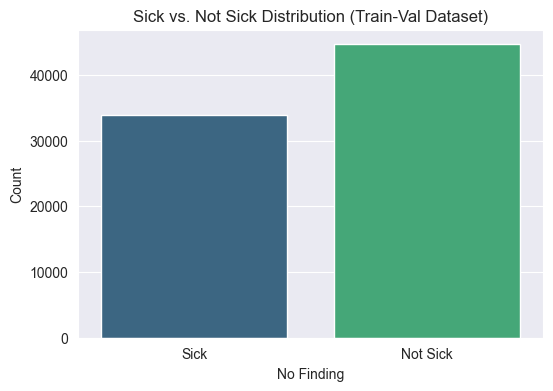

In [12]:
# Plotting for train_val
not_sick_number = (df_train_val['No Finding'] == 0).sum()
sick_number = (df_train_val['No Finding'] == 1).sum()

print(f"Number of images with value 0 in 'No Finding': {not_sick_number}")
print(f"Number of images with value 1 in 'No Finding': {sick_number}")

plot_sick_vs_not_sick(df_train, title="Train-Val Dataset")

Number of images with value 0 in 'No Finding': 13066
Number of images with value 1 in 'No Finding': 8015


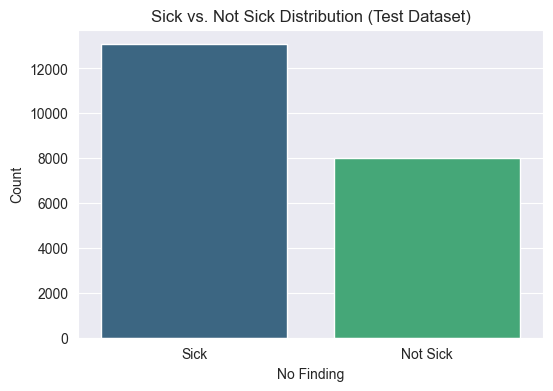

In [13]:
# Plotting for test
not_sick_number_test = (df_test['No Finding'] == 0).sum()
sick_number_test = (df_test['No Finding'] == 1).sum()

print(f"Number of images with value 0 in 'No Finding': {not_sick_number_test}")
print(f"Number of images with value 1 in 'No Finding': {sick_number_test}")
plot_sick_vs_not_sick(df_test, title="Test Dataset")

**# 2. Distribution of Each Category**

In [14]:
def plot_category_distribution(df, title=""):
    category_sums = df.iloc[:, 1:-1].sum()  # Excluding id and subj_id columns
    
    # Sort the category sums in descending order before plotting
    category_sums = category_sums.sort_values(ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x=category_sums.values, y=category_sums.index, palette="viridis", hue=category_sums.index, legend=False)
    plt.title(f"Count of images per Category include Not Finding ({title})")
    plt.ylabel('Thorax Disease Categories')
    plt.xlabel('Count')
    plt.show()

In [15]:
def plot_category_distribution1(df, title=""):
    category_sums = df.iloc[:, 1:-1].sum()  # Excluding id and subj_id columns
    
    # Sort the category sums in descending order before plotting
    category_sums = category_sums.sort_values(ascending=False)
    
    # Reduced figure height for a more compact plot
    plt.figure(figsize=(10, 4))  # Smaller height
    
    # Plot with bars on x-axis and adjusted color palette and bar width
    sns.barplot(
        x=category_sums.index, 
        y=category_sums.values, 
        palette="viridis", 
        hue=category_sums.index, 
        dodge=False,  # Remove dodge to keep bars thinner and uniform
        legend=False
    )
    
    # Title and labels
    plt.title(f"Categories distribution ({title})", fontsize=12)
    plt.ylabel('Count', fontsize=10)
    
    # Rotate x-axis labels for readability and reduce tick label font size
    plt.xticks(rotation=45, ha="right", fontsize=8)
    
    # Grid and ticks: show fewer y-ticks to make the plot less cluttered
    plt.yticks(fontsize=8)
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    
    # Tight layout for compactness
    plt.tight_layout()
    
    # Display the plot
    plt.show()

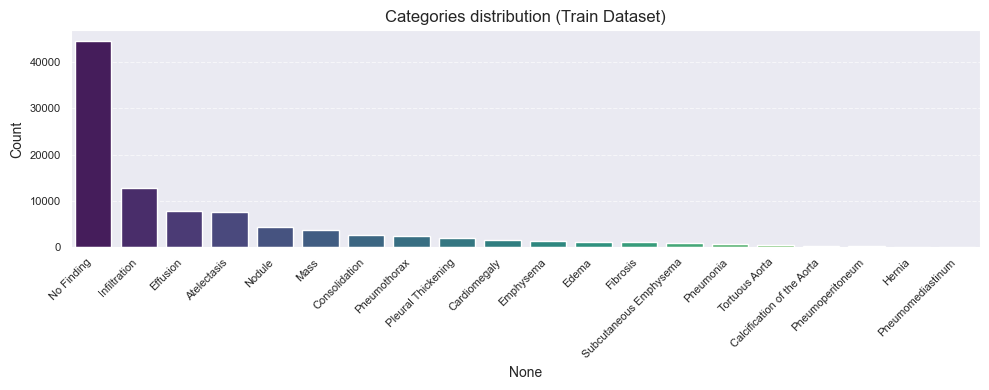

In [26]:
# Plotting for train_val
plot_category_distribution1(df_train, title="Train Dataset")

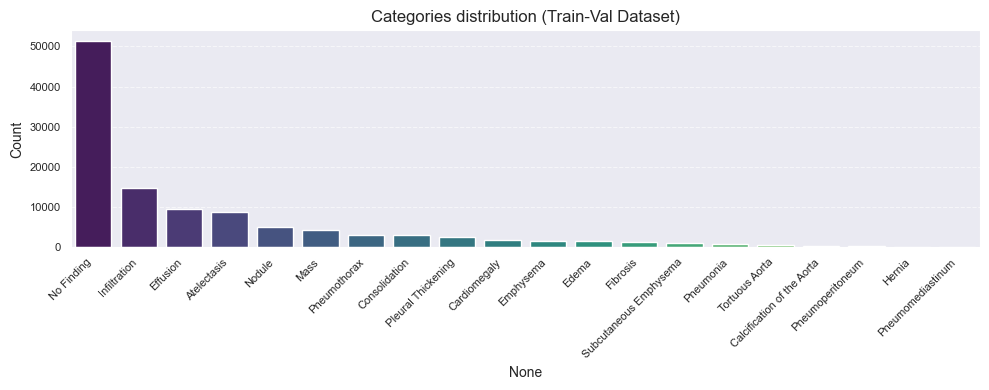

In [27]:
plot_category_distribution1(df_train_val, title="Train-Val Dataset")

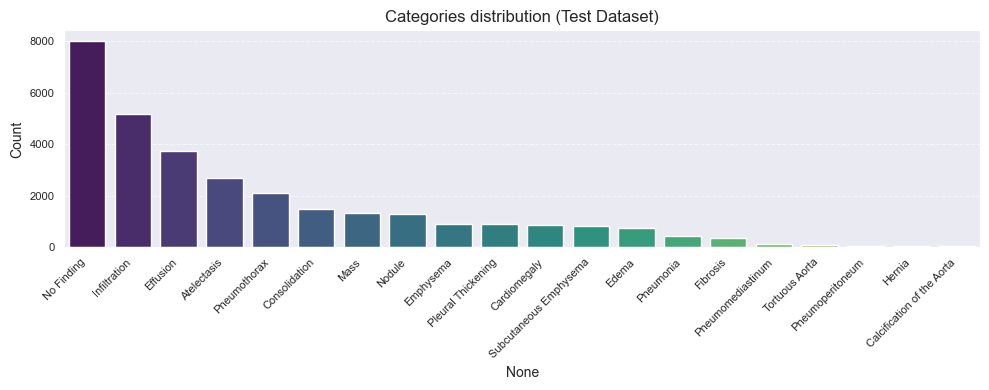

In [17]:
# Plotting for test
plot_category_distribution1(df_test, title="Test Dataset")

**#3. Proportion of each category**

In [18]:



def plot_category_proportion(df, title="",threshold=0.01):
    category_sums = df.iloc[:, 1:-1].sum()  # Excluding id and subj_id columns
    
    # Get the proportions of each category
    proportions = category_sums / category_sums.sum()

    # Group small categories into "Other"
    grouped_proportions = proportions.copy()
    small_categories = grouped_proportions[grouped_proportions < threshold].sum()
    grouped_proportions = grouped_proportions[grouped_proportions >= threshold]
    grouped_proportions['Other'] = small_categories

    # Generate a color palette with a unique color for each category
    colors = sns.color_palette("husl", len(grouped_proportions))  # Using Husl palette for distinct colors

    plt.figure(figsize=(8, 8))
    plt.pie(grouped_proportions, labels=grouped_proportions.index, autopct='%1.1f%%', 
            startangle=90, colors=colors)
    
    plt.title(f"Proportion of Each Category ({title})")
    plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
    plt.show()

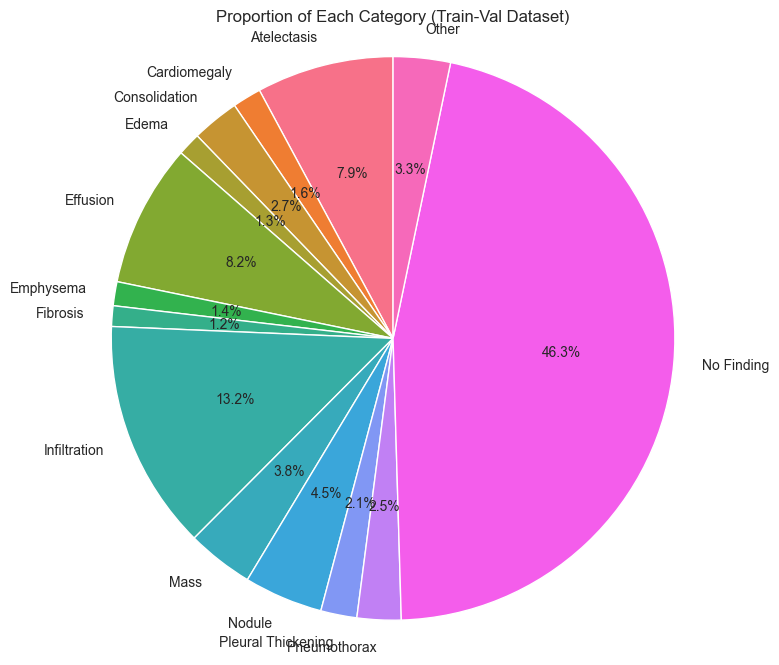

In [19]:
plot_category_proportion(df_train, title="Train-Val Dataset")

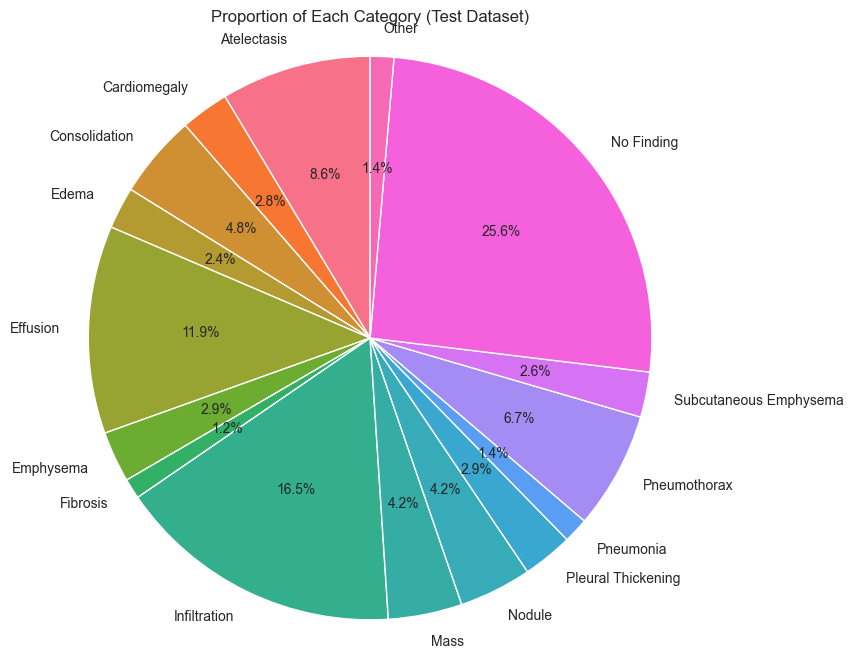

In [20]:
plot_category_proportion(df_test, title="Test Dataset")

***Distribution and proportion summary***
1. Not Finding is almost half of train_val data amount and 0.25 of test data
2. Top 3 except Not Finding: Infiltration, Effusion and Atelectasis is large percentage of total data
3. Distribution for both train_val and test are same
    1. Top 3 are identical: Infiltration, Effusion and Atelectasis
    2. The rest varys bit, but not to much 
4. Finally, its obvious that Not Finding is the largest in both train_val and test

**# 4. Co-occurrence of Conditions (Heatmap)**

Each number in a cell represents the count of samples where both conditions (from the row and column) are present in the same image

In [21]:
def plot_cooccurrence_heatmap(df, title=""):
    # Calculating co-occurrence matrix for each pair of conditions
    # Exclude Not finding from this plot because we already know that all other categories are 0 if no finding 1
    cooccurrence_matrix = df.iloc[:, 1:-2].T.dot(df.iloc[:, 1:-2])  # Excluding id, Not Finding subj_id columns
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cooccurrence_matrix, annot=True, fmt='d', cmap="YlGnBu")
    plt.title(f"Co-occurrence Matrix of Conditions ({title})")
    plt.show()

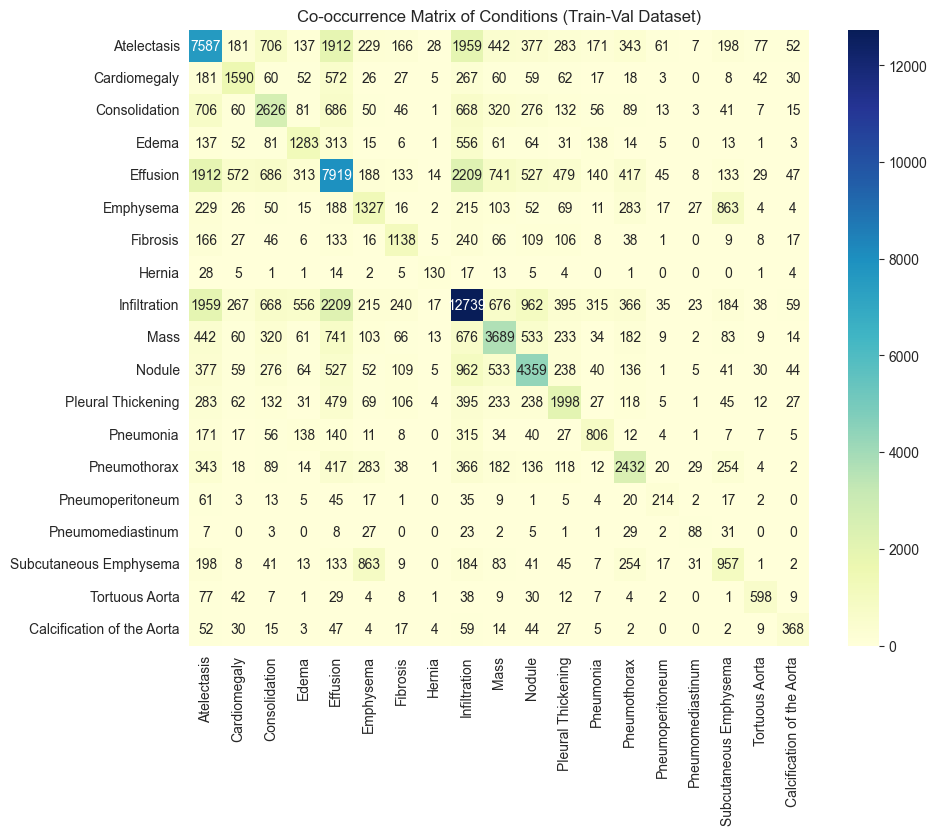

In [22]:
# Plotting for train_val
plot_cooccurrence_heatmap(df_train, title="Train-Val Dataset")

### Summary for Training-Validation Dataset Co-occurrence Matrix

The co-occurrence matrix provides insights into the frequency of cases where pairs of medical conditions appear together in the training-validation dataset.

1. **High Prevalence Conditions**: 
   - Commonly observed conditions include **Atelectasis**, **Effusion**, and **Infiltration**, indicated by high values along the diagonal.

2. **Frequent Co-occurrences**:
   - **Effusion** co-occurs frequently with **Atelectasis** (1959), **Infiltration** (2209), and **Pneumothorax** (417).
   - **Infiltration** is often found with **Effusion** (2209), **Atelectasis** (1959), and **Mass** (533).
   - **Nodule** shows frequent co-occurrence with **Mass** (741) and **Effusion** (962).

3. **Rare Conditions**:
   - Conditions like **Pneumoperitoneum**, **Pneumomediastinum**, and **Tortuous Aorta** are infrequent and have fewer co-occurrences.

4. **Diagonal Dominance**:
   - Higher values along the diagonal indicate that conditions typically appear more frequently on their own than with other conditions.

5. **Color Scale**:
   - The color bar ranges from dark (low values) to light (high values), helping to visually distinguish common from rare co-occurrences.


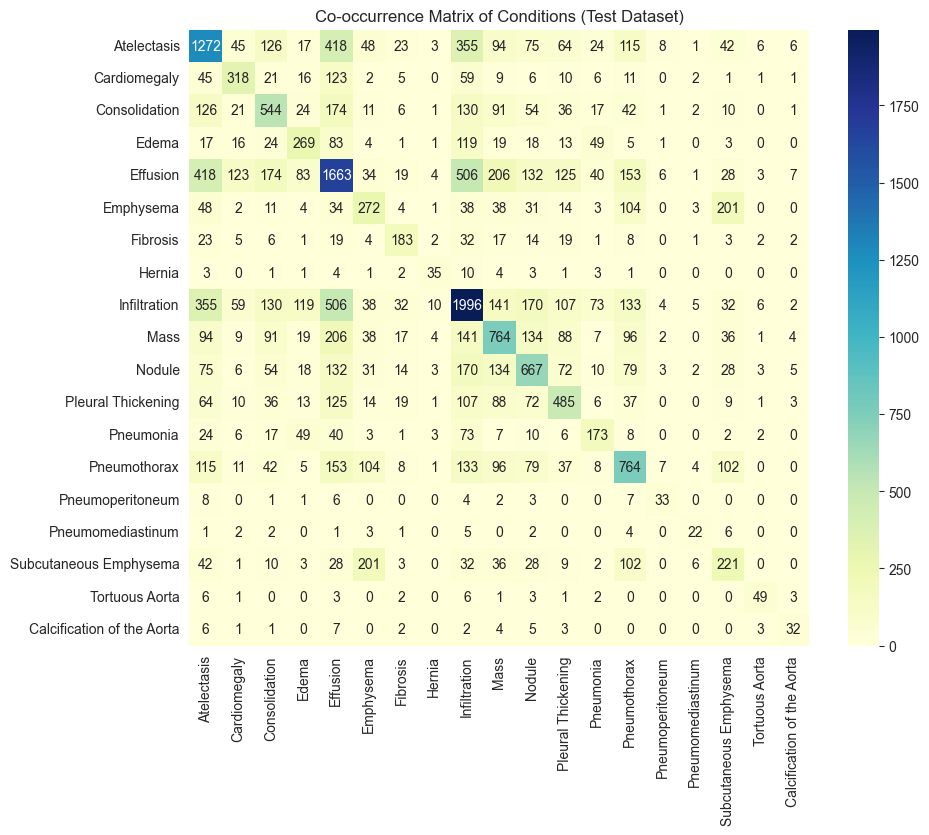

In [23]:
plot_cooccurrence_heatmap(df_val, title="Test Dataset")

### Summary for Test Dataset Co-occurrence Matrix

The co-occurrence matrix for the test dataset highlights the frequency of cases where pairs of medical conditions appear together, specific to the test data.

1. **High Prevalence Conditions**:
   - **Infiltration**, **Effusion**, and **Nodule** show high individual prevalence, as indicated by high values on the diagonal.

2. **Frequent Co-occurrences**:
   - **Effusion** frequently co-occurs with **Atelectasis** (418), **Infiltration** (506), and **Pneumothorax** (153).
   - **Infiltration** is commonly found alongside **Effusion** (506), **Atelectasis** (355), and **Mass** (141).
   - **Nodule** frequently co-occurs with **Mass** (134) and **Effusion** (170).

3. **Rare Conditions**:
   - Rarely occurring conditions, such as **Pneumoperitoneum**, **Pneumomediastinum**, and **Tortuous Aorta**, have fewer co-occurrences in the test dataset.

4. **Diagonal Dominance**:
   - Similar to the training-validation matrix, the high values on the diagonal indicate that these conditions appear more frequently alone than in conjunction with others.

5. **Color Scale**:
   - The color gradient ranges from dark (low values) to light (high values), visually distinguishing frequently occurring from rare co-occurrences.
